# **Insights into the kickstarter crowdfunding data**

## Motivation
In the crowdfunding world, it is interesting to see why projects succeed and fail in collecting the funds. I have interest in exploring the croudfunding model in future and would like to learn more about the same. My interest in the Film & Video category. This data set provides a good start to explore and investigate if there are certain factors/trends that lead to a successful project. 

## Project Aim
The primary scope of this project is to apply learnings from the course of Python for Datascience course on Edx from UCSD. The attempt is to get familar with working using Pandas dataframes, and plotting features of Matplotlib and Seaborn.  

## Research Questions
- What is the percentage of projects that are successful? 
- How does success rate vary with:
    - Length of the name
    - Year/Month/Date of launch
    - Duration
    - Country 
    - Categories
    - Goal amount
- How does the funding vary with the different factors for the Film & Video category? Do all the general trends hold?
- What are the best performing sub categories?
- Explore any correlation amongst the factors.

## Loading Modules and Environment Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import os
from datetime import datetime
import seaborn as sns

## Reading Data

In [2]:
df = pd.read_csv("../input/ks-projects-201801.csv")
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


## Dataset Information



In [3]:
df.shape

(378661, 15)

In [4]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [5]:
df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

## Dataset Preperation and Cleaning

In [6]:
# drop the nan rows 
df.dropna
df.shape

(378661, 15)

In [7]:
# drop the columns 'goal','pledged','usd pledged','launched','deadline','ID' 
df_cleaned = df.drop(['goal','pledged','usd pledged','launched','deadline','ID'], axis = 1)


In [8]:
#convert the time to date time format
df_cleaned['launched_date'] = pd.to_datetime(df['launched'], format='%Y-%m-%d %H:%M:%S')
df_cleaned['deadline_date'] = pd.to_datetime(df['deadline'], format='%Y-%m-%d %H:%M:%S')

In [9]:
# calculate the duration of the project in days. This is the difference between the deadline date and the launched date
df_cleaned['duration'] = df_cleaned['deadline_date'] - df_cleaned['launched_date']
df_cleaned['duration'] = df_cleaned['duration'].dt.days

In [10]:
df_cleaned[df_cleaned['state'] == 'successful']['state'].value_counts()

successful    133956
Name: state, dtype: int64

### Percentage of projects that are successful 

In [11]:
# successful projects / total projects * 100
success_percentage = df_cleaned[df_cleaned['state'] == 'successful']['state'].value_counts() / len(df_cleaned["state"])
print('Sucess Percent = {0:2.2%}' .format(success_percentage[0]))

Sucess Percent = 35.38%


In [12]:
# percentages of all different states
state_percentage = round(df_cleaned['state'].value_counts() / len(df_cleaned["state"]) * 100,1)
print(state_percentage)

failed        52.2
successful    35.4
canceled      10.2
undefined      0.9
live           0.7
suspended      0.5
Name: state, dtype: float64


Removing the canceled, undefined, live, and suspended cases. Also saving the live cases in a seperate dataframe.

In [13]:
df_test = df_cleaned[(df_cleaned['state'] == 'successful') | (df_cleaned['state'] == 'failed')]
df_test_live = df_cleaned[df_cleaned['state'] == 'live']

print (df_test.shape)
print (df_test_live.shape)


(331675, 12)
(2799, 12)


In [14]:
#length of the name of the projects
df_test['length_name'] = df_test.loc[:,'name'].str.len()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
# Launch year, month, date
df_test['launch_year'] = pd.DatetimeIndex(df_test.loc[:,'launched_date']).year
df_test['launch_month'] = pd.DatetimeIndex(df_test.loc[:,'launched_date']).month
df_test['launch_date'] = pd.DatetimeIndex(df_test.loc[:,'launched_date']).day
df_test= df_test.sort_values('launched_date',ascending=True)
df_test = df_test.drop(['launched_date','deadline_date'], axis = 1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [16]:
df_test.columns

Index(['name', 'category', 'main_category', 'currency', 'state', 'backers',
       'country', 'usd_pledged_real', 'usd_goal_real', 'duration',
       'length_name', 'launch_year', 'launch_month', 'launch_date'],
      dtype='object')

## Initial Data Investigation

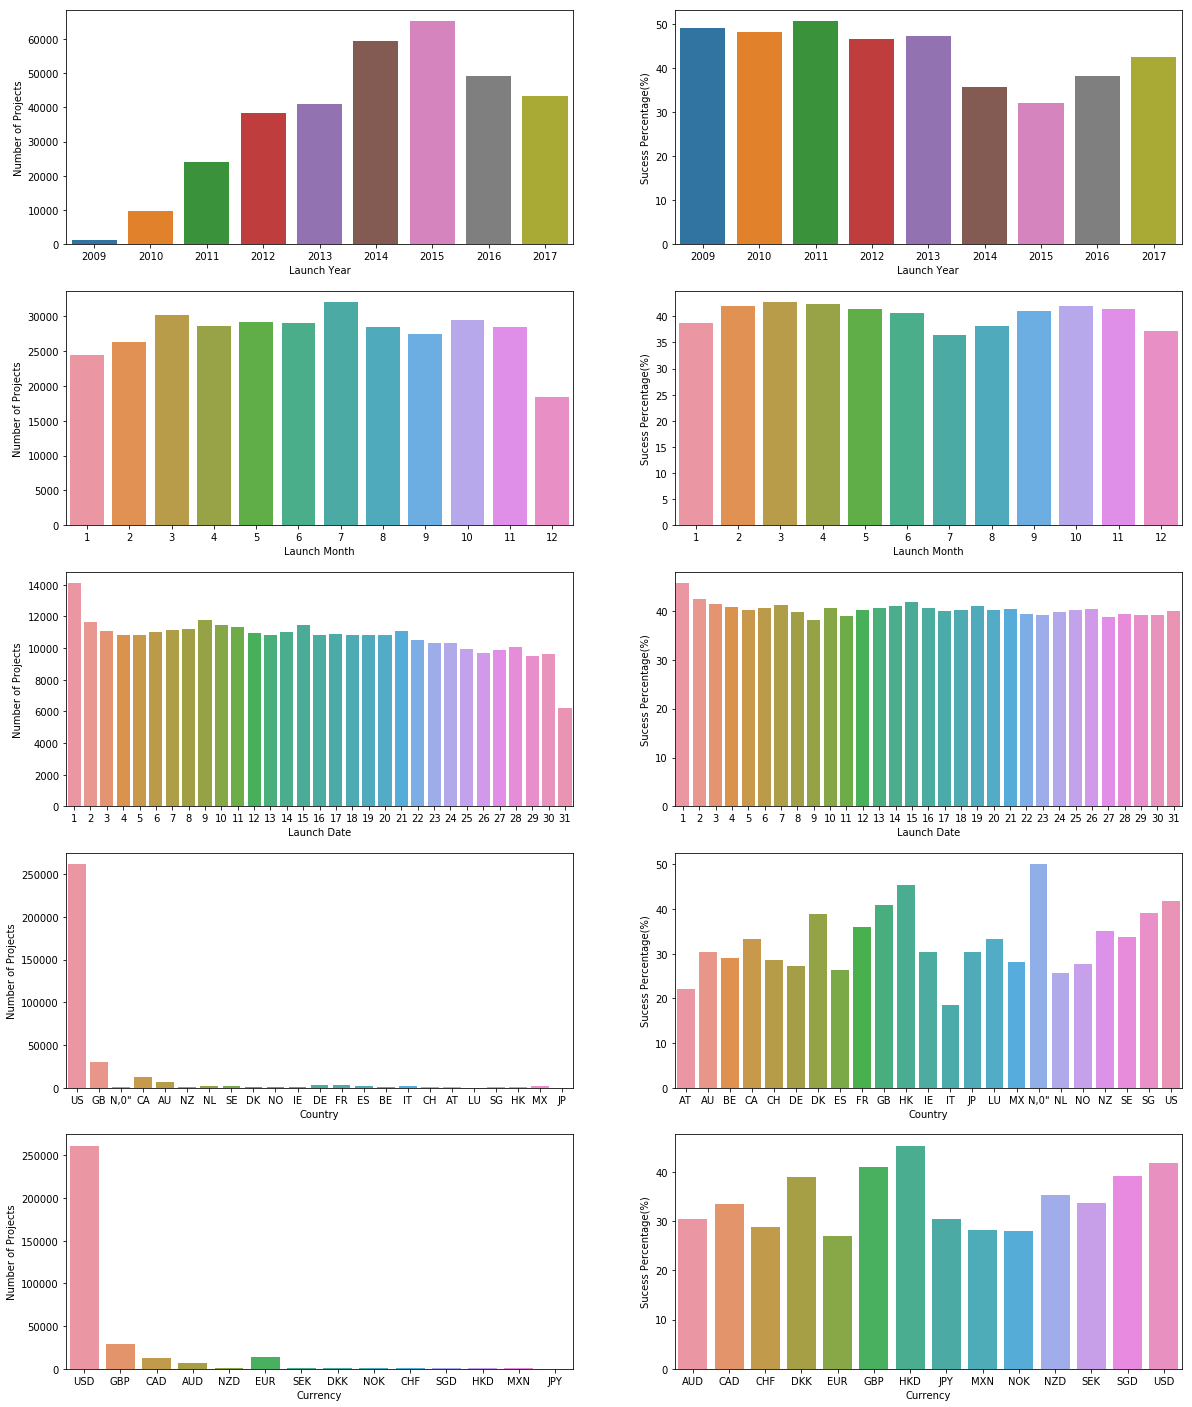

In [17]:
# Generate plots of projects per year, month, date, country, currency
# Generate plots to see the sucess percentages
# Observe any trends

plot_columns = ['launch_year','launch_month','launch_date','country','currency'] 
x_label = ['Launch Year','Launch Month','Launch Date', 'Country','Currency'] 
y_label = ['Number of Projects', 'Sucess Percentage(%)']
fig, axarr = plt.subplots(len(plot_columns), len(y_label), figsize=(20,5*len(plot_columns)))
for i in range(len(plot_columns)):
    a = None
    a = round(100 * df_test[df_test.state == "successful"][plot_columns[i]].value_counts()/df_test[plot_columns[i]].value_counts(), 1)
    # taking the column data/variable for example launch year and count the sucessful number of projects for each year and divide by the total projects in that year. 
    #print (a)
    sns.countplot(df_test[plot_columns[i]],ax=axarr[i][0])
    axarr[i][0].set_xlabel(x_label[i])
    axarr[i][0].set_ylabel(y_label[0])
    sns.barplot(x = a.index,y = a.values,ax=axarr[i][1])
    axarr[i][1].set_xlabel(x_label[i])
    axarr[i][1].set_ylabel(y_label[1])

In [18]:
for i in range(len(plot_columns)):
    a = None
    a = round(100 * df_test[df_test.state == "successful"][plot_columns[i]].value_counts()/df_test[plot_columns[i]].value_counts(), 1)
    # taking the column data/variable for example launch year and count the sucessful number of projects for each year and divide by the total projects in that year. 
    print ( a, '\n')

2009    49.1
2010    48.0
2011    50.6
2012    46.5
2013    47.2
2014    35.6
2015    32.1
2016    38.1
2017    42.5
Name: launch_year, dtype: float64 

1     38.8
2     41.9
3     42.7
4     42.3
5     41.3
6     40.6
7     36.5
8     38.1
9     41.0
10    42.0
11    41.3
12    37.1
Name: launch_month, dtype: float64 

1     45.6
2     42.4
3     41.4
4     40.7
5     40.1
6     40.5
7     41.1
8     39.7
9     38.2
10    40.6
11    39.0
12    40.1
13    40.5
14    40.9
15    41.7
16    40.5
17    39.9
18    40.2
19    41.0
20    40.2
21    40.3
22    39.3
23    39.1
24    39.8
25    40.1
26    40.3
27    38.8
28    39.4
29    39.2
30    39.2
31    39.9
Name: launch_date, dtype: float64 

AT      22.1
AU      30.4
BE      29.1
CA      33.4
CH      28.7
DE      27.3
DK      38.9
ES      26.3
FR      36.0
GB      41.0
HK      45.3
IE      30.3
IT      18.5
JP      30.4
LU      33.3
MX      28.1
N,0"    50.0
NL      25.6
NO      27.8
NZ      35.2
SE      33.7
SG      39.2
US      41.8
Na

In [19]:
# percentage of the main categories in the data
round(100* df_test['main_category'].value_counts()/df_test['main_category'].value_counts().sum(),2)

Film & Video    17.04
Music           13.85
Publishing      10.69
Games            8.60
Technology       8.16
Art              7.73
Design           7.65
Food             6.65
Fashion          5.96
Theater          3.09
Comics           2.98
Photography      2.92
Crafts           2.36
Journalism       1.25
Dance            1.08
Name: main_category, dtype: float64

Text(0, 0.5, 'Number of Projects')

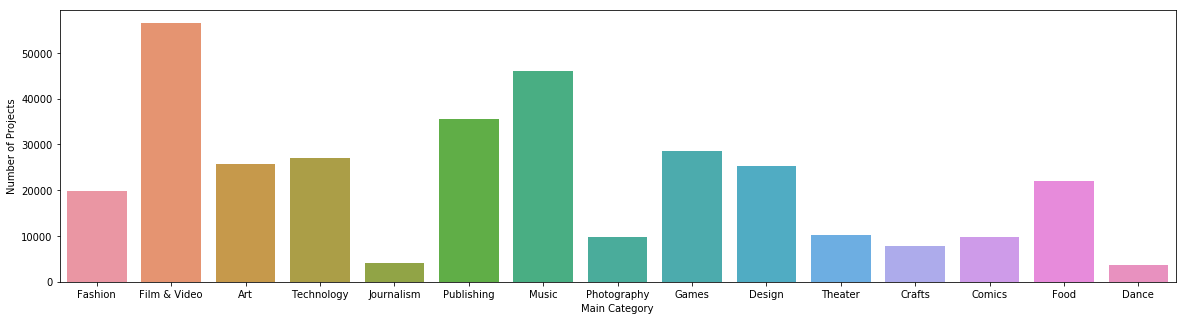

In [20]:
fig, ax = plt.subplots(1,1, figsize=(20, 5))
sns.countplot(df_test['main_category'])
ax.set_xlabel ('Main Category')
ax.set_ylabel ('Number of Projects')

Text(0, 0.5, 'Number of Projects')

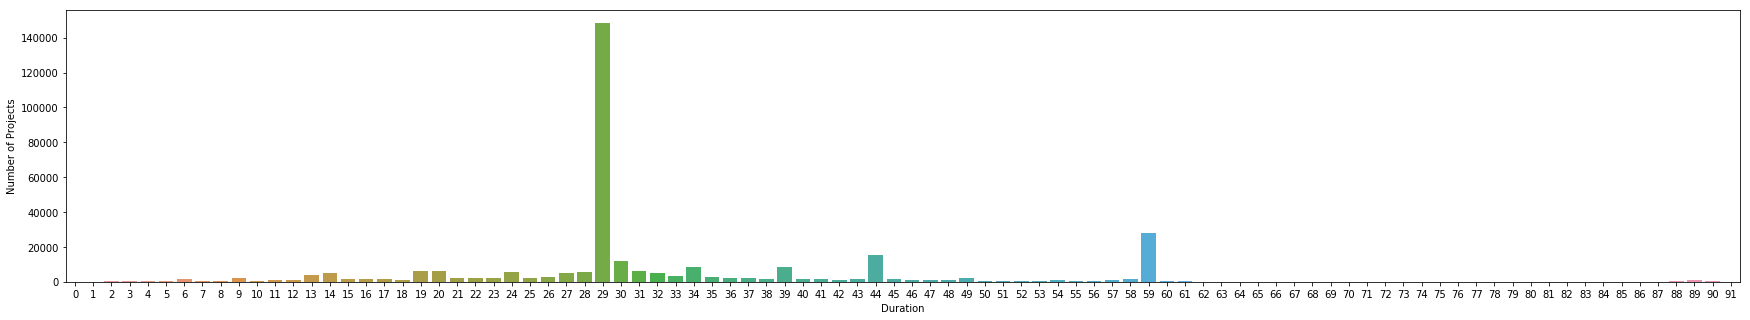

In [21]:
fig, ax = plt.subplots(1,1, figsize=(30, 5))
sns.barplot(df_test['duration'].value_counts().index,df_test['duration'].value_counts().values)
ax.set_xlabel ('Duration')
ax.set_ylabel ('Number of Projects')

Text(0, 0.5, 'Number of Projects')

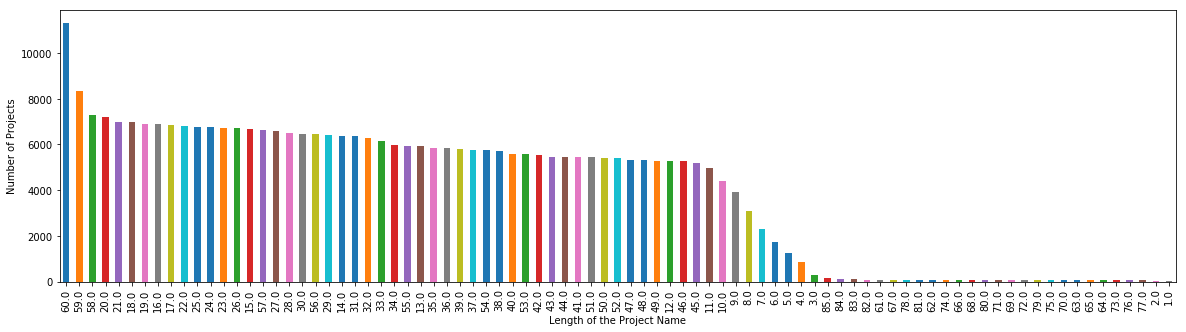

In [22]:
fig, ax = plt.subplots(1,1, figsize=(20, 5))
df_test['length_name'].value_counts().plot(kind='bar', figsize=(20,5))
ax.set_xlabel ('Length of the Project Name')
ax.set_ylabel ('Number of Projects')

## Here is the summary from initial data investigation:
- 2015 is the year with most completed projects in the dataset
- Film & Video is the main category with most projects
- Duration of 29 days has the most number of projects
- 60 is the length of project name for maximum projects
- Most of the projects in the data set are from US and the currency is USD. 

In the further analysis a subset will be created comprising of only projects from US and with currency of USD. This will also reduce the number of columns. 


## Investigation - Data Subset/Data of Interest 
- Country - US
- Category - Video & Film

We will also drop the columns of - country, currency, category. Will analyze this in futures studies. 
We will also check if all the previous findings will hold.

In [23]:
df_US = df_test[(df_test.country == "US") & df_test.main_category.str.contains('Film & Video')]
df_US['state_val'] = (df_US['state'] == 'successful') * 1
df_US = df_US.drop(['country','currency','main_category','state'], axis = 1)
print(df_US.shape)
df_US.category.value_counts().index[0:10]

(46933, 11)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Index(['Documentary', 'Shorts', 'Film & Video', 'Webseries', 'Narrative Film',
       'Animation', 'Comedy', 'Drama', 'Horror', 'Television'],
      dtype='object')

Create the dataframe with the top 10 of the categories in the Film & Video 

In [24]:
list_cat = list(df_US.category.value_counts().index[0:10]) # Top 10 of the categories in the Film & Video 
df_US_sub = None
for j in range(len(list_cat)):
    #print (j)
    if j == 0:
        #print (list_cat[j])
        df_US_sub = df_US[df_US.category.str.contains(list_cat[j])]
        #print (df_US_sub.shape)
    else:
        #print (list_cat[j])
        new_portion = df_US[df_US.category.str.contains(list_cat[j])]
        df_US_sub = pd.concat([df_US_sub,new_portion])
        #print (df_US_sub.shape)
        #print (new_portion.shape)
df_US_sub.shape


(43985, 11)

In [25]:
# Observing the number of projects in each of the categories
df_US_sub.category.value_counts()

Documentary       12349
Shorts             9534
Film & Video       7404
Webseries          4484
Narrative Film     4252
Animation          1789
Comedy             1421
Drama              1245
Horror              810
Television          697
Name: category, dtype: int64

Text(0, 0.5, 'Number of Projects')

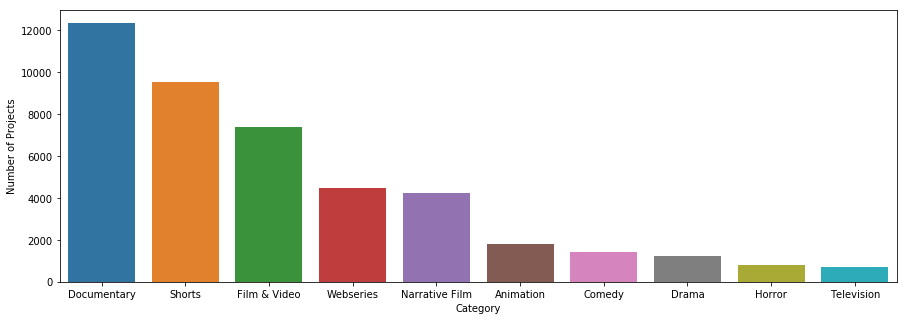

In [26]:
fig, ax = plt.subplots(1,1, figsize=(15, 5))
sns.countplot(df_US_sub['category'])
ax.set_xlabel ('Category')
ax.set_ylabel ('Number of Projects')

In [27]:
# sucess percentage of the Film&Video
print ("Film & Video sucess percentage is : ", round(100 * df_US_sub[df_US_sub.state_val == 1].size/df_US_sub.size, 1))

Film & Video sucess percentage is :  42.8


Text(0, 0.5, 'Success Percentage')

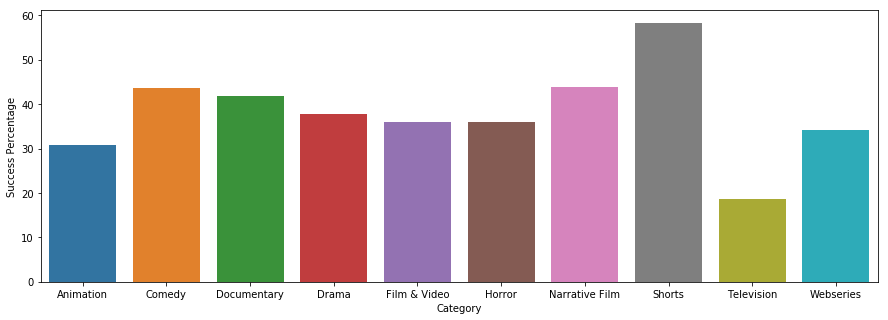

In [28]:
fig, ax = plt.subplots(1,1, figsize=(15, 5))
a = None
a = round(100 * df_US_sub[df_US_sub.state_val == 1].category.value_counts()/df_US_sub.category.value_counts(), 1)
sns.barplot(x = a.index,y = a.values)
ax.set_xlabel('Category')
ax.set_ylabel('Success Percentage')

In [29]:
print ('Category.......Sucess Percentage')
print (a)

Category.......Sucess Percentage
Animation         30.7
Comedy            43.6
Documentary       41.8
Drama             37.9
Film & Video      35.9
Horror            36.0
Narrative Film    43.8
Shorts            58.3
Television        18.7
Webseries         34.1
Name: category, dtype: float64


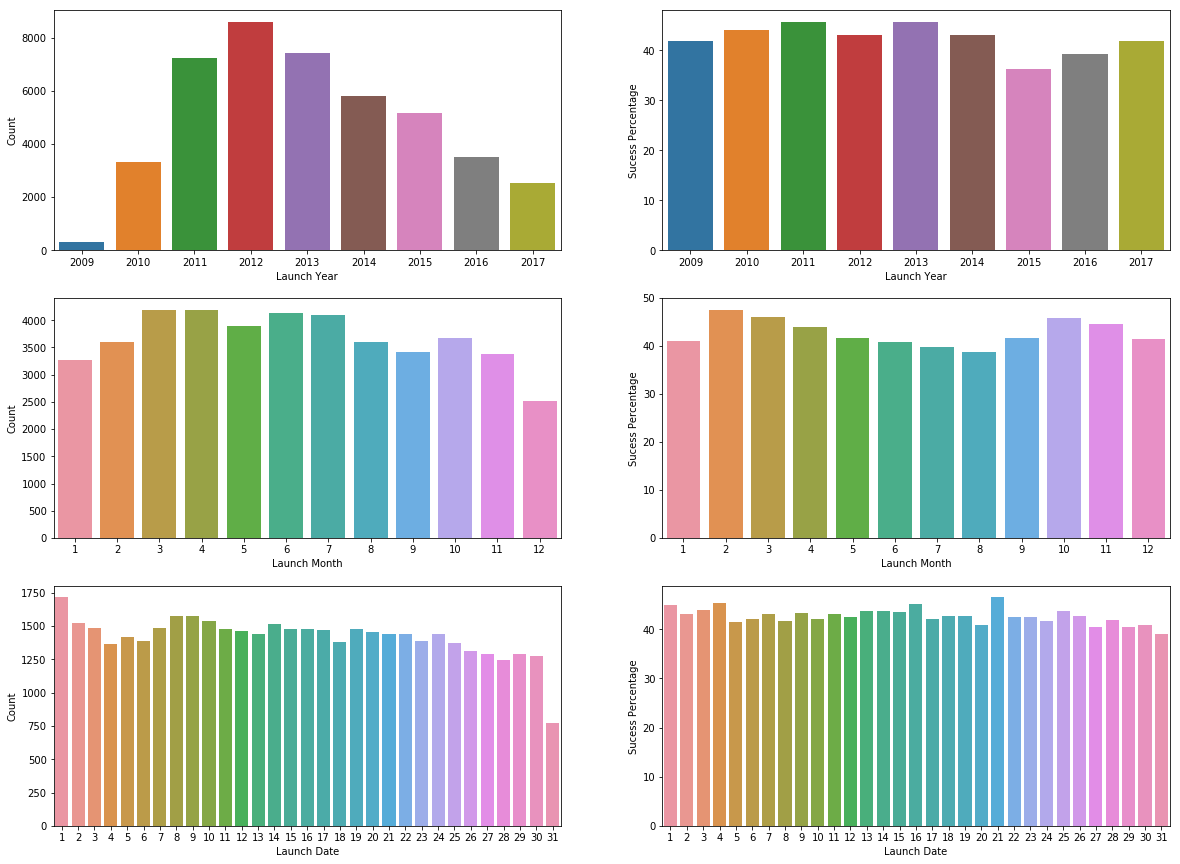

In [30]:
plot_columns = ['launch_year','launch_month','launch_date'] 
x_label = ['Launch Year','Launch Month','Launch Date'] 
y_label = ['Count', 'Sucess Percentage']
fig, axarr = plt.subplots(len(plot_columns), len(y_label), figsize=(20,5*len(plot_columns)))
for i in range(len(plot_columns)):
    a = None
    a = round(100 * df_US_sub[df_US_sub.state_val == 1][plot_columns[i]].value_counts()/df_US_sub[plot_columns[i]].value_counts(), 1)
    # taking the column data/variable for example launch year and count the sucessful number of projects for each year and divide by the total projects in that year. 
    #print (i)
    sns.countplot(df_US_sub[plot_columns[i]],ax=axarr[i][0])
    axarr[i][0].set_xlabel(x_label[i])
    axarr[i][0].set_ylabel(y_label[0])
    sns.barplot(x = a.index,y = a.values,ax=axarr[i][1])
    axarr[i][1].set_xlabel(x_label[i])
    axarr[i][1].set_ylabel(y_label[1])

Text(0, 0.5, 'Number of Projects')

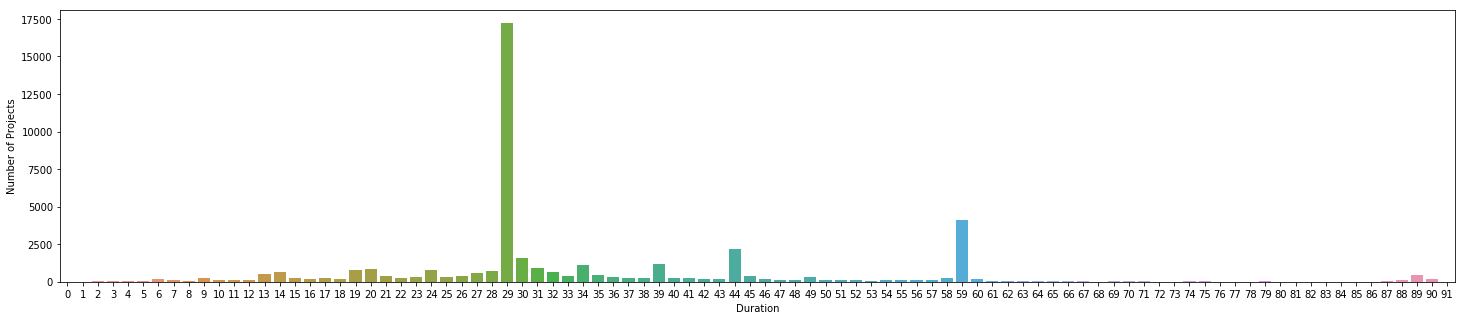

In [31]:
fig, ax = plt.subplots(1,1, figsize=(25, 5))
sns.barplot(df_US_sub['duration'].value_counts().index,df_US_sub['duration'].value_counts().values)
ax.set_xlabel('Duration')
ax.set_ylabel('Number of Projects')

Text(0, 0.5, 'Number of Projects')

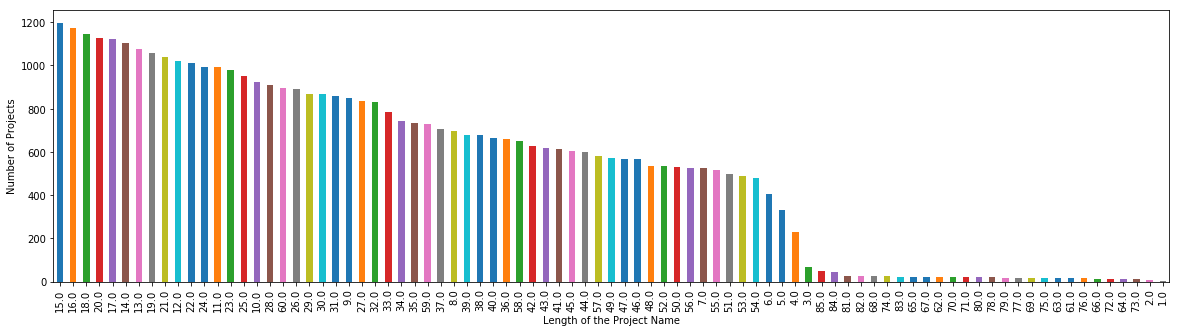

In [32]:
fig, ax = plt.subplots(1,1, figsize=(20, 5))
df_US_sub['length_name'].value_counts().plot(kind='bar', figsize=(20,5))
ax.set_xlabel('Length of the Project Name')
ax.set_ylabel('Number of Projects')

## Conclusion from the "Film & Video" Main_Category
This portion only considers projects in US.

- Based on the intial data analysis, most of the projects in Kickstarter are from US. 
- The highest number of projects are in the categories of [Documentary, Shorts, Film&Video]. Note that the Film&Video category is also sub category under the main_cateory of Film&Video.
- The most sucessful category is Shorts followed by Narratives and Comedy.
- The trends in sucess percentage per year, per month and per date shows a similar behavior as the overall data. It does not provide any clear trends.
- The success percentage of the Film&Video Main_category is 42.8% while the overall sucess percentage was 35.8%.
- From the duration data i.e., the difference between launch date and end date, 29 and 59 days seem the duration with most projects.


## Future Work

Since this was a week long project work for the course, here are some ideas that I would like to explore in the future:
- Create the variables corresponding to backers per dollar amount, ratio of pledged to the goal amount and observe the trends with the projects.
- Normalize the data and generate correlations.
- Create a predictive model and check its accuracy. 
- Use the model on the live projects data. Since the live projects data is from 2018, try to find newer data from Kickstarter website and check model accuracy.


This is my first submission and I welcome all comments! :)


#### Creating additional two columns:
- backer_per_usd = backer per every USD of the goal amount 
- pledge_to_goal = ratio of pledge amount to goal amount (less than 1 would be failed and >=1 would be sucessful)

In [33]:
df_US_sub['backer_per_usd'] = (df_US_sub.backers/df_US_sub.usd_goal_real)
print (df_US_sub.backer_per_usd.round(2).value_counts().head())
df_US_sub['pledge_to_goal'] = (df_US_sub.usd_pledged_real/df_US_sub.usd_goal_real)
print (df_US_sub.pledge_to_goal.round(2).value_counts().head())

0.00    24768
0.01    10419
0.02     5239
0.03     1785
0.04      767
Name: backer_per_usd, dtype: int64
0.00    9681
0.01    2376
1.00    1853
0.02    1536
1.01    1520
Name: pledge_to_goal, dtype: int64


In [34]:
backers = df_US_sub['backers'].unique()
launch_year = df_US_sub['launch_year'].unique()
launch_month = df_US_sub['launch_month'].unique()
launch_date = df_US_sub['launch_date'].unique()
state = df_US_sub['state_val'].unique()

In [35]:
df_US_sub.columns

Index(['name', 'category', 'backers', 'usd_pledged_real', 'usd_goal_real',
       'duration', 'length_name', 'launch_year', 'launch_month', 'launch_date',
       'state_val', 'backer_per_usd', 'pledge_to_goal'],
      dtype='object')

## Check for correlation

In [36]:
corr = df_US_sub.corr(method = 'pearson')


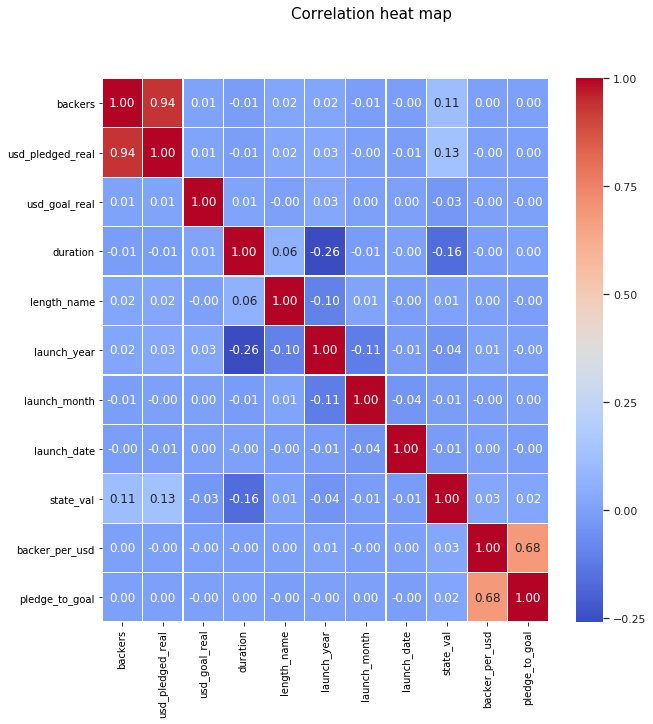

In [37]:
# plot the heatmap
fig, ax = plt.subplots(1,1, figsize=(10, 10))
fig.suptitle('Correlation heat map', fontsize = 15)
sns.set(font_scale=1)  
sns.heatmap(corr, 
            cmap = 'coolwarm',
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot = True,
            fmt = '.2f',
            linewidths = 0.25,
            cbar_kws={"orientation": "vertical"})

In [38]:
df_group = df_US_sub.groupby(['launch_year'])

In [39]:
df_group.head()

,name,category,backers,usd_pledged_real,usd_goal_real,duration,length_name,launch_year,launch_month,launch_date,state_val,backer_per_usd,pledge_to_goal
28960,"""All We Had"" Gets Into Cannes -- $10 or More G...",Documentary,4,40.00,300.0,19,71.0,2009,4,30,0,0.013333,0.133333
19872,daily digest,Documentary,14,700.00,700.0,27,12.0,2009,5,4,1,0.020000,1.000000
329525,Dollar Van Demos,Documentary,1,100.00,2000.0,25,16.0,2009,5,6,0,0.000500,0.050000
42488,Do It Again: One Man's Quest to Reunite the Kinks,Documentary,79,6632.32,5500.0,84,49.0,2009,5,17,1,0.014364,1.205876
344959,Project Pedal,Documentary,20,1105.00,1000.0,32,13.0,2009,5,19,1,0.020000,1.105000
368751,Ben Pearson: An Archery Legend,Documentary,5,205.00,9000.0,89,30.0,2010,1,1,0,0.000556,0.022778
369484,We Blog For Love: A Documentary,Documentary,7,300.00,2500.0,86,31.0,2010,1,4,0,0.002800,0.120000
94819,East of Liberty documentary series www.eastof...,Documentary,2,45.00,8000.0,67,57.0,2010,1,6,0,0.000250,0.005625
136082,Jobriath A.D.,Documentary,53,3781.00,18000.0,89,14.0,2010,1,7,0,0.002944,0.210056
159673,HAITI - EARTHQUAKE DISASTER RELIEF AND DOCUME...,Documentary,56,4292.78,4000.0,30,65.0,2010,1,7,1,0.014000,1.073195


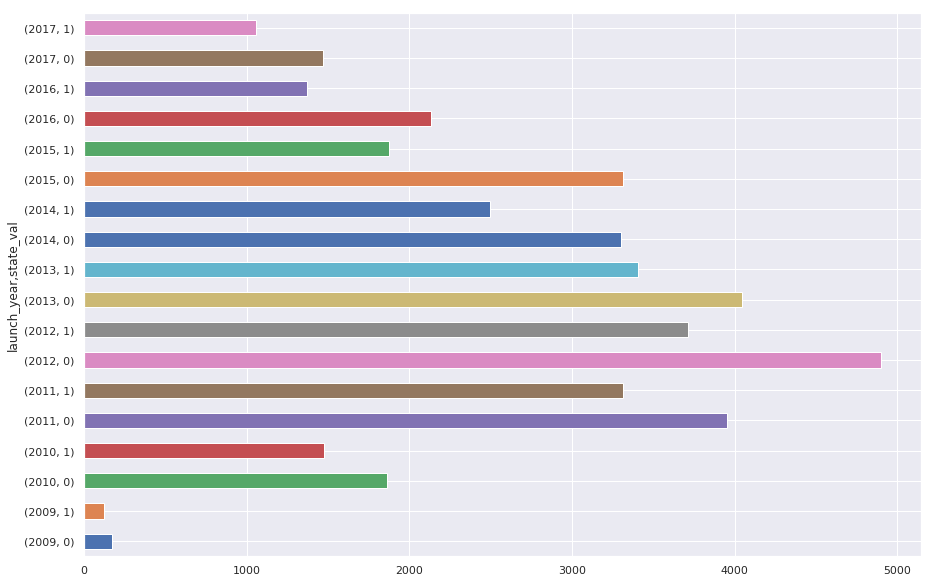

In [40]:
df_group.state_val.value_counts().plot(kind='barh', figsize = (15,10))

In [41]:
a = df_test.groupby(['launch_year']).state.value_counts()

In [42]:
year_data=[]
year_sucess_percentage = []
for launch_year, state in df_test.groupby(['launch_year']).state.value_counts().groupby(level=0):
    #print(state[0])
    #print (state[1])        
    year_data.append(launch_year)
    year_sucess_percentage.append(round((state[0]/(state[0]+state[1]))*100))

Success percentages of projects over the years:
      Sucess_percentage  Failed_percentage
Year                                      
2009               51.0               49.0
2010               52.0               48.0
2011               51.0               49.0
2012               54.0               46.0
2013               53.0               47.0
2014               64.0               36.0
2015               68.0               32.0
2016               62.0               38.0
2017               57.0               43.0


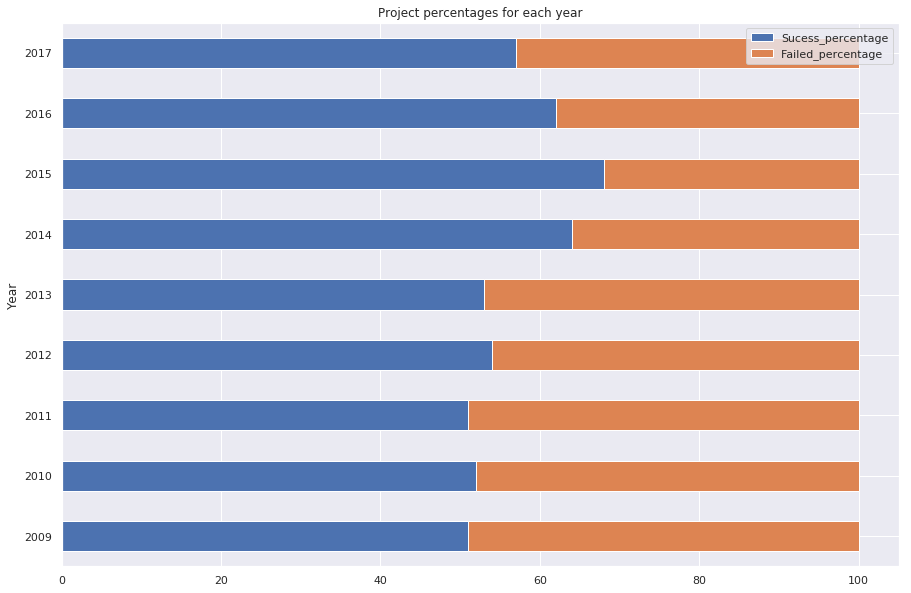

In [43]:
df_year_percent = pd.DataFrame.from_dict({'Year':year_data, 'Sucess_percentage':year_sucess_percentage}).set_index('Year')
df_year_percent['Failed_percentage'] = 100 - df_year_percent['Sucess_percentage']
print ("Success percentages of projects over the years:")
print (df_year_percent)
df_year_percent.plot(kind='barh',stacked = True, legend = 'True', figsize=(15,10),title='Project percentages for each year')

In [44]:
cat_data=[]
cat_sucess_percentage = []
for category, state in df_test.groupby(['main_category']).state.value_counts().groupby(level=0):
    #print (state[0])
    #print (state[1]) 
    #print (category)
    cat_data.append(category)
    cat_sucess_percentage.append(round((state[0]/(state[0]+state[1]))*100))

Success percentages of projects for the main categories:
              Sucess_percentage  Failed_percentage
Category                                          
Art                        55.0               45.0
Comics                     59.0               41.0
Crafts                     73.0               27.0
Dance                      65.0               35.0
Design                     58.0               42.0
Fashion                    72.0               28.0
Film & Video               58.0               42.0
Food                       72.0               28.0
Games                      56.0               44.0
Journalism                 76.0               24.0
Music                      53.0               47.0
Photography                66.0               34.0
Publishing                 65.0               35.0
Technology                 76.0               24.0
Theater                    64.0               36.0


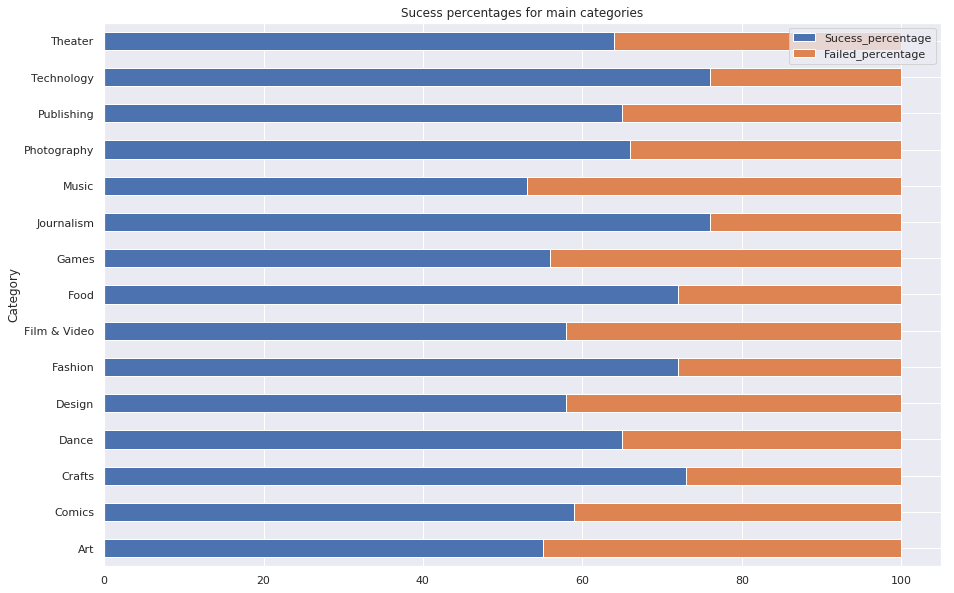

In [45]:
df_cat_percent = pd.DataFrame.from_dict({'Category':cat_data, 'Sucess_percentage':cat_sucess_percentage}).set_index('Category')
df_cat_percent['Failed_percentage'] = 100 - df_cat_percent['Sucess_percentage']
print ("Success percentages of projects for the main categories:")
print (df_cat_percent)
df_cat_percent.plot(kind='barh',stacked = True, legend = 'best', figsize=(15,10),title='Sucess percentages for main categories')

In [46]:
country_data=[]
country_sucess_percentage = []
for country, state in df_test.groupby(['country']).state.value_counts().groupby(level=0):
    #print (state[0])
    #print (state[1]) 
    #print (category)
    country_data.append(country)
    country_sucess_percentage.append(round((state[0]/(state[0]+state[1]))*100))

Success percentages of projects for different countries:
         Sucess_percentage
Country                   
AT                    78.0
AU                    70.0
BE                    71.0
CA                    67.0
CH                    71.0
DE                    73.0
DK                    61.0
ES                    74.0
FR                    64.0
GB                    59.0
HK                    55.0
IE                    70.0
IT                    81.0
JP                    70.0
LU                    67.0
MX                    72.0
N,0"                  50.0
NL                    74.0
NO                    72.0
NZ                    65.0
SE                    66.0
SG                    61.0
US                    58.0


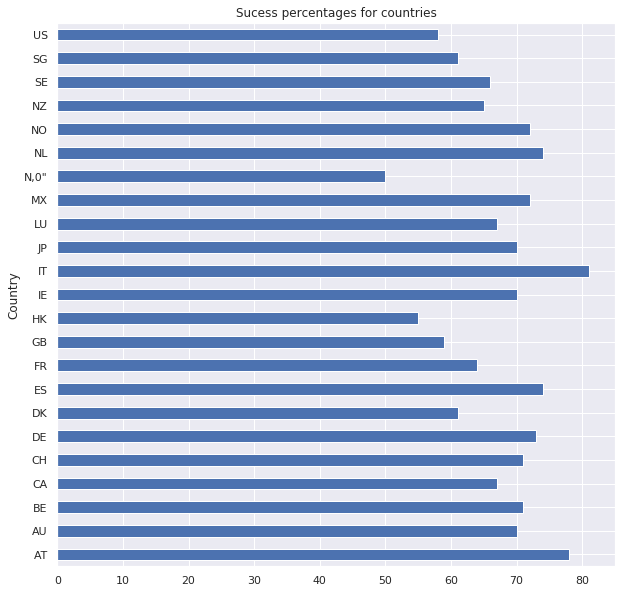

In [47]:
df_country_percent = pd.DataFrame.from_dict({'Country':country_data, 'Sucess_percentage':country_sucess_percentage}).set_index('Country')
print ("Success percentages of projects for different countries:")
print (df_country_percent)
df_country_percent.plot(kind='barh',legend = None, figsize=(10,10),title='Sucess percentages for countries')
